**Równania różniczkowe zwyczajne**

In [51]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 2.**

In [52]:
# Numerical stability amplification factor functions (Q = λ*h)
explicit_euler_amp_factor = lambda Q: 1 + Q
implicit_euler_amp_factor = lambda Q: 1/(1-Q)
trapezoidal_amp_factor = lambda Q: (1 + 0.5*Q)/(1 - 0.5*Q)
modified_euler_amp_factor = lambda Q: 1 + Q + 0.5*Q**2
RK4_amp_factor = lambda Q: 1 + Q + 0.5*Q**2 + 1/6*Q**3 + 1/24*Q**4

lambd = -5
h = 0.5
Q = lambd*h
print(explicit_euler_amp_factor(Q), implicit_euler_amp_factor(Q), trapezoidal_amp_factor(Q), 
      modified_euler_amp_factor(Q), RK4_amp_factor(Q))

-1.5 0.2857142857142857 -0.1111111111111111 1.625 0.6484375


For t=0.5, y=3.5


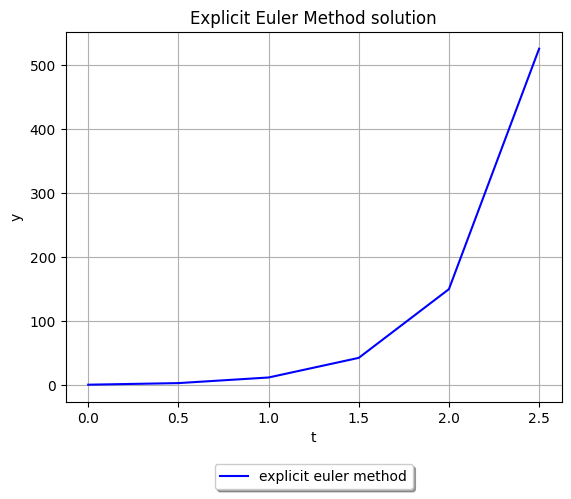

In [53]:
n = 5

# Explicit Euler Method
args = []
values = []
t = 0
y = 1
args.append(t)
values.append(y)
for i in range(n):
    t += h
    y = y + h*(-lambd*y)
    args.append(t)
    values.append(y)

print(f"For t={args[1]}, y={values[1]}")

# Plot
plt.title("Explicit Euler Method solution")
plt.plot(args, values, color='blue', label='explicit euler method')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

For t=0.5, y=0.2857142857142857


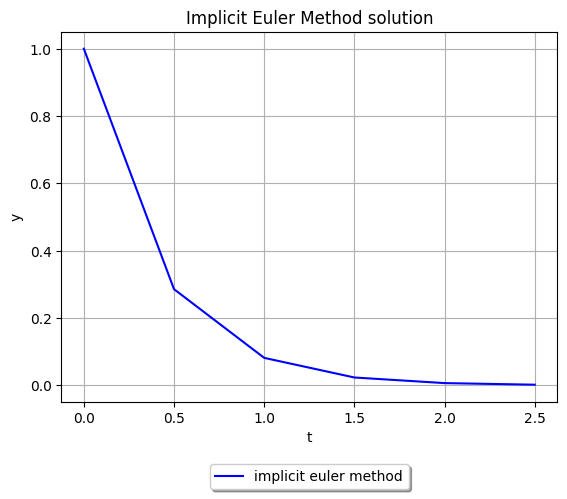

In [54]:
n = 5

# Implicit Euler Method
args = []
values = []
t = 0
y = 1
args.append(t)
values.append(y)
for i in range(n):
    t += h
    y = y/(1-lambd*h)
    args.append(t)
    values.append(y)

print(f"For t={args[1]}, y={values[1]}")

# Plot
plt.title("Implicit Euler Method solution")
plt.plot(args, values, color='blue', label='implicit euler method')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 3.**

In [55]:
# Data
S_0 = 762
I_0 = 1
R_0 = 0

N = S_0 + I_0 + R_0
beta = 1
gamma = 1/7

h = 0.2
t_range = np.array([h*i for i in range(71)])

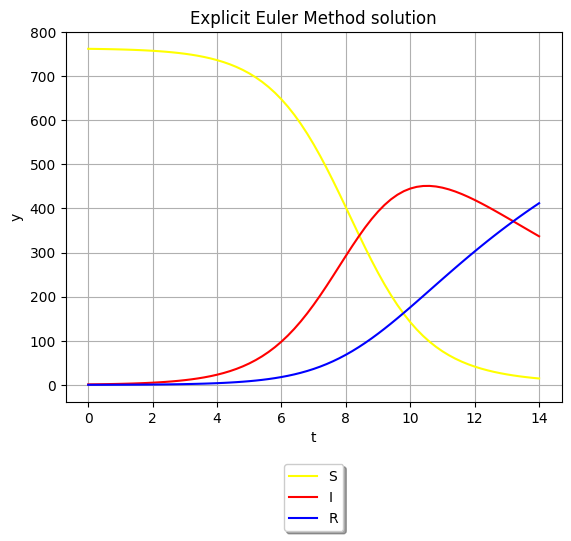

In [56]:
# Initial values
S_values = [S_0]
I_values = [I_0]
R_values = [R_0]
S, I, R = S_0, I_0, R_0

# Explicit Euler Method
for t in t_range:
    if t==0: continue
    R_old = R
    S_old = S
    I_old = I
    R = R_old + h*gamma*I_old
    S = S_old - h*beta*I_old*S_old/N
    I = I_old + h*beta*I_old*S_old/N - h*gamma*I_old
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

# Plot
plt.title("Explicit Euler Method solution")
plt.plot(t_range, S_values, color='yellow', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

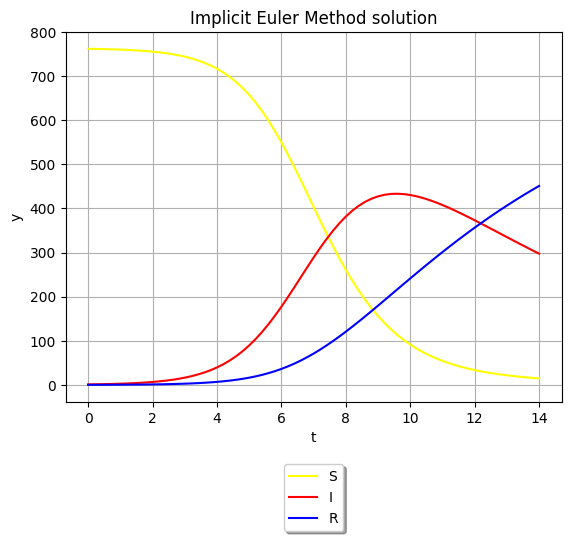

In [57]:
# Initial values
S_values = [S_0]
I_values = [I_0]
R_values = [R_0]
S, I, R = S_0, I_0, R_0

# Implicit Euler Method
def func(x):
    S, I, R = x
    eq_1 = S - S_old + h*beta*I*S/N
    eq_2 = I - I_old - h*beta*I*S/N + h*gamma*I
    eq_3 = R - R_old - h*gamma*I
    return eq_1, eq_2, eq_3


for t in t_range:
    if t==0: continue
    S_old = S
    I_old = I
    R_old = R
    # R = R_old + h*gamma*I
    # S = S_old - h*beta*I*S/N
    # I = I_old + h*beta*I*S/N - h*gamma*I
    S, I, R = scipy.optimize.fsolve(func, [S_old, I_old, R_old])
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

# Plot
plt.title("Implicit Euler Method solution")
plt.plot(t_range, S_values, color='yellow', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

In [ ]:
# Initial values
S_values = [S_0]
I_values = [I_0]
R_values = [R_0]
S, I, R = S_0, I_0, R_0

# RK4 Method
def func(x):
    S, I, R = x
    eq_1 = S - S_old + h*beta*I*S/N
    eq_2 = I - I_old - h*beta*I*S/N + h*gamma*I
    eq_3 = R - R_old - h*gamma*I
    return eq_1, eq_2, eq_3


for t in t_range:
    if t==0: continue
    S_old = S
    I_old = I
    R_old = R
    # R = R_old + h*gamma*I
    # S = S_old - h*beta*I*S/N
    # I = I_old + h*beta*I*S/N - h*gamma*I
    S, I, R = scipy.optimize.fsolve(func, [S_old, I_old, R_old])
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

# Plot
plt.title("Implicit Euler Method solution")
plt.plot(t_range, S_values, color='yellow', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()